In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('rated_emotion_results.csv')

# Encode user and item IDs to integer indices
user_enc = LabelEncoder()
df['user'] = user_enc.fit_transform(df['actor'].values)
item_enc = LabelEncoder()
df['item'] = item_enc.fit_transform(df['frame'].values)
df['rating'] = df['rating'].values.astype(np.float32)

num_users = df['user'].nunique()
num_items = df['item'].nunique()

# Create training and test sets
X = df[['user', 'item']].values
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the collaborative filtering model
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.dot = tf.keras.layers.Dot(axes=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        return self.dot([user_vector, item_vector])

# Instantiate and compile the model
model = RecommenderNet(num_users, num_items)
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
# history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))





Epoch 1/5

 207/3058 [=>............................] - ETA: 9:57 - loss: nan

In [3]:

        
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 0.6572 - val_loss: 0.6203
Epoch 2/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.6163 - val_loss: 0.6190
Epoch 3/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.6084 - val_loss: 0.6128
Epoch 4/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.6090 - val_loss: 0.6151
Epoch 5/5
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.6075 - val_loss: 0.6128


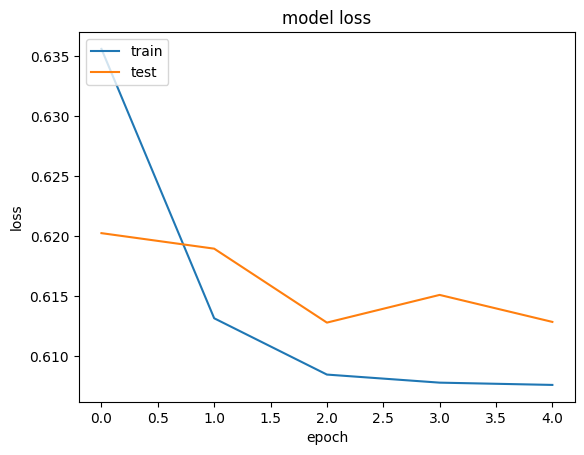

In [4]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [5]:

# Make recommendations for a specific user (actor)
def recommend_items(user_id, num_recommendations=5):
    user_index = user_enc.transform([user_id])[0]
    user_vector = np.array([user_index] * num_items)
    item_vector = np.array(range(num_items))
    predictions = model.predict(np.stack([user_vector, item_vector], axis=1))
    recommended_items = np.argsort(predictions[:, 0])[-num_recommendations:]
    recommended_frames = item_enc.inverse_transform(recommended_items)
    return recommended_frames

# Example: Recommend 5 items for actor 'Ses01F'
recommended_frames = recommend_items('Ses01F', num_recommendations=5)
print("********Top 5 recommendations are***********\n",recommended_frames)

5577/5577 [==============================] - 20s 4ms/step
********Top 5 recommendations are***********
 ['G:\\IITB dataset\\IEMOCAP_full_release\\Session1\\dialog\\avi\\new\\Ses01F_script03_1_frame_4007.jpg'
 'G:\\IITB dataset\\IEMOCAP_full_release\\Session1\\dialog\\avi\\new\\Ses01F_script03_1_frame_4008.jpg'
 'G:\\IITB dataset\\IEMOCAP_full_release\\Session1\\dialog\\avi\\new\\Ses01F_script03_1_frame_4009.jpg'
 'G:\\IITB dataset\\IEMOCAP_full_release\\Session1\\dialog\\avi\\new\\Ses01F_script03_1_frame_4001.jpg'
 'G:\\IITB dataset\\IEMOCAP_full_release\\Session1\\dialog\\avi\\new\\Ses01M_script03_2_frame_9999.jpg']
